In [1]:
# latex rendering
import matplotlib.pyplot as plt 


# Enable LaTeX rendering
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern Roman'
plt.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"

import plot_functions as p_func
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

c_scheme = p_func.c_scheme_02()

In [2]:
# read files

fname1 = "Data/efficiency.csv"
csv_data_1 = pd.read_csv(fname1, sep=",")

csv_data_1


,I (mA) 21.4,P (mW) 21.4,I (mA) 20.4,P (mW) 20.4,I (mA) 22.9,P (mW) 22.9,I (mA) 24.7,P (mW) 24.7,I (mA) 22.9 ADJ,P (mW) 24.7 ADJ
0,30,0.027,28.0,0.021,28.0,0.020,28.0,0.021,28.0,0.042
1,31,0.030,30.0,0.025,30.0,0.025,30.0,0.025,30.0,0.051
2,32,0.032,32.0,0.033,32.0,0.033,32.0,0.031,32.0,0.070
3,33,0.037,34.0,0.047,34.0,0.045,34.0,0.044,33.0,0.093
4,34,0.047,36.0,0.069,36.0,0.064,36.0,0.060,34.0,0.699
5,35,0.052,37.0,0.098,38.0,0.120,37.0,0.077,35.0,1.500
6,36,0.071,38.0,0.134,37.0,0.086,38.0,0.113,36.0,2.410
7,37,0.085,39.0,0.307,39.0,0.350,39.0,0.194,37.0,3.059
8,38,0.124,40.0,0.744,40.0,0.754,40.0,0.370,38.0,3.858
9,39,0.307,41.0,1.242,41.0,1.162,41.0,0.810,40.0,5.376


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

von1, zu1 = 4, 20

# Extract data
x = csv_data_1["I (mA) 22.9 ADJ"][von1:zu1]
y = csv_data_1["P (mW) 24.7 ADJ"][von1:zu1]

# Define linear function
def linear_func(x, m, b):
    return m * x + b

# Fit
params, pcov = curve_fit(linear_func, x, y)
m, b = params
m_err, b_err = np.sqrt(np.diag(pcov))  # standard errors

# Predict and MSE
y_pred = linear_func(x, m, b)

# Print results with uncertainties
print(f"Slope (m): {m:.4f} ± {m_err:.4f}")
print(f"Intercept (b): {b:.4f} ± {b_err:.4f}")
print(f"x-achsenabschnitt = {-b/m}")

Slope (m): 0.7167 ± 0.0034
Intercept (b): -23.4718 ± 0.1593
x-achsenabschnitt = 32.751200089752466


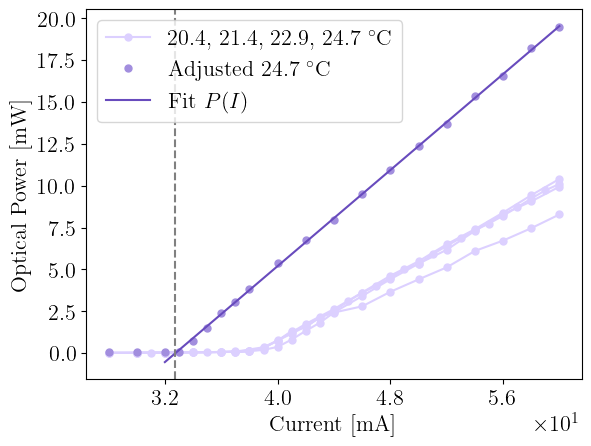

In [5]:
cols3 = ["#DCD0FF", "#BFAFEF", "#A28EDE", "#856DCE", "#684BBD"] # nice

von1, zu1 = 170, -340

m_fit, b_fit = 0.7167, -23.4718
x_toshowfit = np.linspace(32, 60, 10)
y_toshowfit = linear_func(x_toshowfit, m_fit, b_fit)

plot_1_LEFTAXIS = [
    [csv_data_1["I (mA) 21.4"], csv_data_1["P (mW) 21.4"], r"20.4, 21.4, 22.9, 24.7 $^{\circ}$"f"C", cols3[0], "-", "o"],
    [csv_data_1["I (mA) 20.4"], csv_data_1["P (mW) 20.4"], r"", cols3[0], "-", "o"],
    [csv_data_1["I (mA) 22.9"], csv_data_1["P (mW) 22.9"], r"", cols3[0], "-", "o"],
    [csv_data_1["I (mA) 24.7"], csv_data_1["P (mW) 24.7"], r"", cols3[0], "-", "o"],
    [csv_data_1["I (mA) 22.9 ADJ"], csv_data_1["P (mW) 24.7 ADJ"], r"Adjusted 24.7 $^{\circ}$"f"C", cols3[2], "", "o"],
    [x_toshowfit, y_toshowfit, r"Fit $P(I)$", cols3[4], "-", ""],
]

vlins = [[-b_fit/m_fit, "grey", "--"]]
# fit 

# p_func.plot_with_one_axis(plot_1_LEFTAXIS, name_x='Current [mA]', name_y='Optical Power [mW]', plot_title='', filename_to_save='../Figures/results setup1 laser efficiency', marker_size='4', font_size=16, offset_text_size=16, legend_local='best', legend_size=16, x_ticks_limit=5, x_ticks_numstyle='sci', line_width=1.5, y_lim=None)

p_func.plot_with_one_axis_with_vertical_lines(plot_1_LEFTAXIS, name_x="Current [mA]", name_y="Optical Power [mW]", plot_title="", filename_to_save="../Figures/results setup1 laser efficiency", marker_size="5", font_size=16, offset_text_size=16, legend_local="best", legend_size=16, x_ticks_limit=5, vlines=vlins, y_lim = None) # [data_x, data_y, label, colorr, line_style, marker_type], [[x_val, color, linestyle], ...]
